In [1]:
import pandas as pd 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [3]:
df = pd.read_excel('lophoc.xlsx', sheet_name='data')
df

,Sức khỏe,Thời tiết,Kết quả
0,ốm,u ám,có
1,ốm,mưa,có
2,ốm,nắng,không
3,ốm,u ám,có
4,tốt,u ám,không
5,tốt,mưa,không
6,tốt,nắng,có


In [4]:
# tập dữ liệu input và output
X = df.iloc[:,:-1] # features
y = df.iloc[:, -1] # target

X

,Sức khỏe,Thời tiết
0,ốm,u ám
1,ốm,mưa
2,ốm,nắng
3,ốm,u ám
4,tốt,u ám
5,tốt,mưa
6,tốt,nắng


In [5]:
y

0       có
1       có
2    không
3       có
4    không
5    không
6       có
Name: Kết quả, dtype: object

In [6]:
# chuyển kiểu string về số

from sklearn.preprocessing import LabelEncoder

encHealth = LabelEncoder()
X['Sức khỏe'] = encHealth.fit_transform(X['Sức khỏe'])

encWeather = LabelEncoder()
X['Thời tiết'] = encWeather.fit_transform(X['Thời tiết'])

X

C:\Users\Admin\AppData\Local\Temp\ipykernel_8244\2350851621.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Sức khỏe'] = encHealth.fit_transform(X['Sức khỏe'])
C:\Users\Admin\AppData\Local\Temp\ipykernel_8244\2350851621.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Thời tiết'] = encWeather.fit_transform(X['Thời tiết'])


,Sức khỏe,Thời tiết
0,1,2
1,1,0
2,1,1
3,1,2
4,0,2
5,0,0
6,0,1


In [7]:
# chia tập dữ liệu

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=34)

X_train

,Sức khỏe,Thời tiết
4,0,2
6,0,1
5,0,0
2,1,1
1,1,0


In [8]:
# tạo model với phương pháp phân nhánh gốc là dùng entropy
modelDT = DecisionTreeClassifier(criterion='entropy', max_depth=3)

# train model
modelDT = modelDT.fit(X_train, y_train)

In [9]:
modelDT.classes_

array(['có', 'không'], dtype=object)

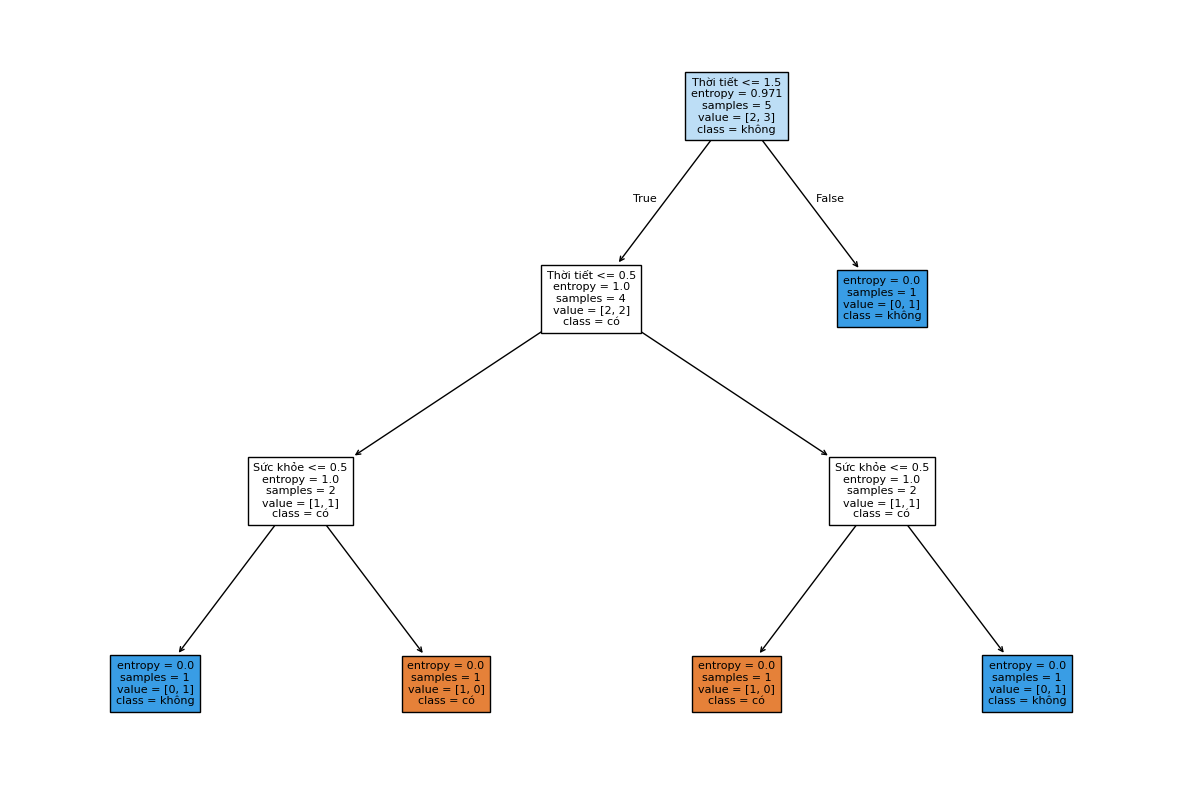

In [10]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

feature_cols = X_train.columns

plt.figure(figsize=(15,10))
plot_tree(modelDT, feature_names=feature_cols, class_names=modelDT.classes_, fontsize=8, filled=True)
plt.show()

In [11]:
# thực hiện dự đoán
y_test_pred = modelDT.predict(X_test)

# Đánh giá mô hình bằng độ đo accuracy
print(f'Accuracy: {metrics.accuracy_score(y_test, y_test_pred)}')

Accuracy: 0.0


In [15]:
# tạo confusion matrix

from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_test_pred)

#tn 0
#fp 2
#fn 0
#tp 0

cf_matrix

tn, fp, fn, tp = cf_matrix.ravel()

print(f'{tn}, {fp}, {fn}, {tp}')

0, 2, 0, 0


In [18]:
# sinh viên tự tính tpr, fnr, fpr, tnr

print(f'tpr: {tp / (tp + fn)}')
print(f'fnr: {fn / (tp + fn)}')
print(f'fpr: {fp / (fp + tn)}')
print(f'tnr: {tn / (fp + tn)}')


tpr: nan
fnr: nan
fpr: 1.0
tnr: 0.0


C:\Users\Admin\AppData\Local\Temp\ipykernel_8244\1403583457.py:3: RuntimeWarning: invalid value encountered in scalar divide
  print(f'tpr: {tp / (tp + fn)}')
C:\Users\Admin\AppData\Local\Temp\ipykernel_8244\1403583457.py:4: RuntimeWarning: invalid value encountered in scalar divide
  print(f'fnr: {fn / (tp + fn)}')


In [21]:
# sinh viên tự vẽ auc, roc

In [14]:
# xây dựng chương trình dự báo
import numpy as np
health = 'ốm'
health_scaled = encHealth.transform([health])

weather = 'nắng'
weather_scaled = encWeather.transform([weather])

feature_sample = np.array([health_scaled[0], weather_scaled[0]])

y_sample_pred = modelDT.predict([feature_sample])
y_sample_pred

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['không'], dtype=object)